<a href="https://colab.research.google.com/github/EdwinAR99/TalentoTECH-Repo/blob/master/Convolution_MNIST_TalentoTECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBS

In [16]:
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#DATASET MNIST

In [2]:
# Charge the MNIST dataset
mnist = keras.datasets.mnist

# Load the training and test split of MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalize the training and test pixels values of images
x_train = x_train / 255
x_test = x_test / 255

# MODEL

In [4]:
# Build the classification model
model = Sequential([
    # Add convolutional and max pooling layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),

    # Add the same layers as before
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [5]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Training the model
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 41s 21ms/step - loss: 0.1557 - accuracy: 0.9543
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0532 - accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0342 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0225 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0139 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0102 - accuracy: 0.9967
Epoch 7/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0054 - accuracy: 0.9982
Epoch 9/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0051 - accuracy: 0.9984
Epoch 10/10
1875/1875 [==============================] - 36s 19m

# TEST

<Axes: >

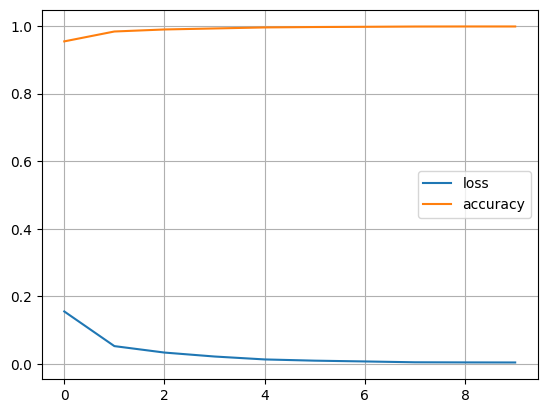

In [7]:
# Grafic the training history
pd.DataFrame(history.history).plot(grid=True)

In [8]:
# Evaluate the model in the training dataset
loss, accuracy = model.evaluate(x_train, y_train)
print('Pérdida en el conjunto de entrenamiento:', loss)
print('Precisión en el conjunto de entrenamiento:', accuracy)

# Evaluate the model with data unseen data
loss, accuracy = model.evaluate(x_test, y_test)
print('Pérdida en el conjunto de entrenamiento:', loss)
print('Precisión en el conjunto de entrenamiento:', accuracy)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.0055 - accuracy: 0.9983
Pérdida en el conjunto de entrenamiento: 0.0054580774158239365
Precisión en el conjunto de entrenamiento: 0.9982500076293945
313/313 [==============================] - 2s 6ms/step - loss: 0.0609 - accuracy: 0.9857
Pérdida en el conjunto de entrenamiento: 0.060854509472846985
Precisión en el conjunto de entrenamiento: 0.9857000112533569


# INFORMATION

In [10]:
# Predict
index = 1
print(f'Label: {y_test[index]}')
classification = model.predict(x_test[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 119ms/step
Classification:
 [[5.1566551e-10]
 [3.5149923e-09]
 [1.0000000e+00]
 [2.6576043e-14]
 [1.3533507e-19]
 [7.0957393e-17]
 [4.9113227e-11]
 [2.1533401e-17]
 [9.7129850e-16]
 [1.8477768e-15]]
Label: 2
1/1 [==============================] - 0s 32ms/step
Classification:
 [[5.1566551e-10]
 [3.5149923e-09]
 [1.0000000e+00]
 [2.6576043e-14]
 [1.3533507e-19]
 [7.0957393e-17]
 [4.9113227e-11]
 [2.1533401e-17]
 [9.7129850e-16]
 [1.8477768e-15]]


In [11]:
print(y_test[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [29]:
first = 2
second = 5
third = 14

print(y_test[first])
print(y_test[second])
print(y_test[third])

1
1
1


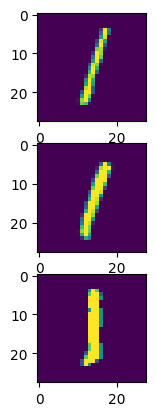

In [30]:
f, axarr = plt.subplots(3, 1)
axarr[0].imshow(x_test[first])
axarr[1].imshow(x_test[second])
axarr[2].imshow(x_test[third])

In [31]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs = model.input, outputs = layer_outputs)

1/1 [==============================] - 0s 24ms/step


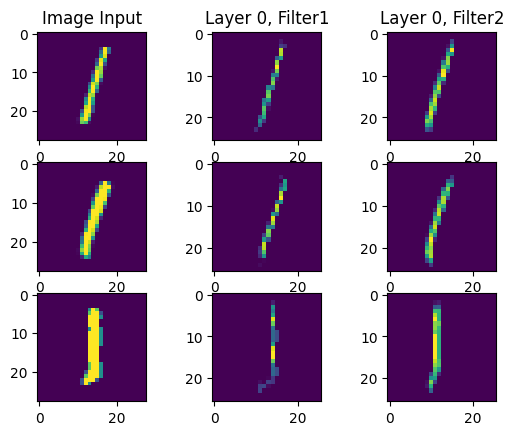

In [33]:
f, axarr = plt.subplots(3, 3)

axarr[0, 0].set_title('Image Input')
axarr[0, 0].imshow(x_test[first])
f1 = activation_model.predict(x_test[first].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer " + str(layer) + ", Filter1")
axarr[0, 1].imshow(f1[0, :, :, filter1])
axarr[0, 2].set_title("Layer " + str(layer) + ", Filter2")
axarr[0, 2].imshow(f1[0, :, :, filter2])

axarr[1, 0].imshow(x_test[second])
f2 = activation_model.predict(x_test[second].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, :, :, filter1])
axarr[1, 2].imshow(f2[0, :, :, filter2])

axarr[2, 0].imshow(x_test[third])
f3 = activation_model.predict(x_test[third].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, :, :, filter1])
axarr[2, 2].imshow(f3[0, :, :, filter2])